検索したいキーワードを入力してください：Echo 第2世代
          在庫有無                                      タイトル     値段  \
0     NOT SOLD    送料込　最新モデル　新品　Echo 第2世代　ヘザーグレー (ファブリック)   4480   
1     NOT SOLD     送料込　最新モデル　新品　Echo 第2世代　チャコール (ファブリック)   4480   
2     NOT SOLD   送料込　最新モデル　新品　Echo 第2世代　サンドストーン (ファブリック)   4480   
3     NOT SOLD     Echo 第2世代 - スマートスピーカー with Alexa 期間限定  10000   
4     NOT SOLD   Echo 第2世代 - スマートスピーカー with Alexa、ヘザーグレー   6999   
5     NOT SOLD  Echo 第2世代 - スマートスピーカー with Alexa ２つセット‼️  13800   
6     NOT SOLD                Amazon echo dot （第2世代）ブラック   2280   
7     NOT SOLD      Echo 第2世代 - スマートスピーカー with Alexa、グレー   7777   
8     NOT SOLD    Amazon Echo Dot (エコードット)第3世代 スマートスピーカー   3200   
9     NOT SOLD  Echo 第2世代 - スマートスピーカー with Alexa、サンドストーン   6999   
10        SOLD         Amazon Echo チャコール 本体 アマゾンエコー 第2世代   4480   
11        SOLD  【オッスン様専用】Amazon echo dot スマートスピーカー　Alexa   2200   
12    NOT SOLD         Echo Dot (エコードット) 第2世代 （専用ホルダー付き）   3500   
13    NOT SOLD         Echo 第2世代

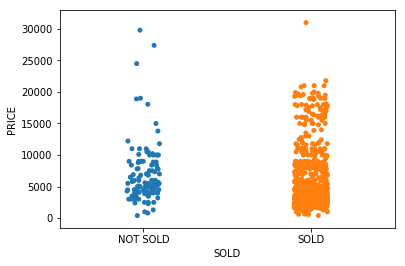

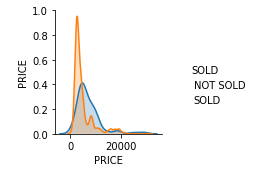

終了


In [4]:
import sys
sys.path.append(r"c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


word = input("検索したいキーワードを入力してください：")
browser = webdriver.Chrome("C:/Users/user/Desktop/Selenium2/chromedriver.exe")
df_main = pd.DataFrame(columns=['在庫有無','タイトル','値段','URL'])
df_graf = pd.DataFrame(columns=['SOLD','PRICE'])

for num in range(1,10):
    res = browser.get("https://www.mercari.com/jp/search/?page="+str(num)+"&keyword="+word)
    item_boxlist = browser.find_elements_by_css_selector(".items-box")
    if len(item_boxlist) ==0:
        break
    for item_box in item_boxlist:
        if len(item_box.find_elements_by_css_selector(".item-sold-out-badge")) > 0:
            sold = "SOLD"
        else:
            sold = "NOT SOLD"
        sub_title = item_box.find_element_by_class_name("items-box-body")
        title = sub_title.find_element_by_tag_name("h3").text
        item_price = item_box.find_element_by_css_selector(".items-box-price")
        price_text = item_price.text
        price_text = re.sub(r",","",price_text).lstrip("¥ ")
        price_text_int = int(price_text)
        url = item_box.find_element_by_tag_name("a").get_attribute("href")
        data  = pd.Series( [ sold,title,price_text_int,url ], index=df_main.columns )
        grdata = pd.Series( [ sold,price_text_int ], index=df_graf.columns )
        df_main = df_main.append( data, ignore_index=True )
        df_graf = df_graf.append( grdata, ignore_index=True )        
print(df_main)
sns.stripplot(x='SOLD', y='PRICE', data=df_graf)
plt.show()
sns.pairplot(df_graf,hue="SOLD")
plt.show()
df_main.to_csv("pricedata.csv", encoding="utf_8_sig")
print("終了")